# Predicting Construction Accident Severity with Natural Language Processing and Data-Driven Recommendations.

## Imports

In this section, we import the Python libraries and modules required for our project. These libraries provide essential functionality for data manipulation, visualization, and machine learning.

In [189]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import json
from collections import defaultdict

import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_curve, average_precision_score, auc, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_extraction import text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score

import xgboost as xgb


from scipy.sparse import hstack
import xgboost as xgb

import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pmjustafort/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Dataset Overview

Before diving into the analysis, it's essential to get an overview of the dataset. In this section, we will explore the dataset's structure, the types of features it contains, and basic statistics to gain a better understanding of the data.

#### Loading The Data.

In [30]:
# Loading the CSV file into a DataFrame 
df = pd.read_csv('Data/OSHA HSE DATA_ALL ABSTRACTS 15-17_FINAL.csv')

In [31]:
# Displaying the first few rows of the DataFrame
df.head()

,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,con_end,Construction End Use,build_stor,Building Stories,proj_cost,Project Cost,proj_type,Project Type,Degree of Injury,nature_of_inj,Nature of Injury,part_of_body,Part of Body,event_type,Event type,evn_factor,Environmental Factor,hum_factor,Human Factor,task_assigned,Task Assigned,hazsub,fat_cause,fall_ht
0,220982664,8/10/2017,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"FINGER,MECHANICAL POWER PRESS,AMPUTATION,GUARD",0,,0,,0,,0,,Nonfatal,1,"Amputation, Crushing",10,Fingers,2,Caught in or between,2,Catch Point/Puncture Action,14,Other,1,Regularly Assigned,0,0,0
1,220973937,7/17/2017,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"CAUGHT IN,DRIVE SHAFT,RESIDENTIAL CONSTRUCTION...",H,Other building,1,1,0,,B,Alteration or rehabilitation,Nonfatal,9,Dislocation,10,Fingers,2,Caught in or between,18,Other,10,Position Inappropriate For Task,1,Regularly Assigned,0,0,0
2,220967632,6/30/2017,"At 7:30 a.m. on June 30, 2017, an employee was...",EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,"AMPUTATED,EXPLOSION,FIREWORKS",0,,0,,0,,0,,Nonfatal,5,Fire Burn,12,Hand,14,Other,18,Other,4,Malfunction In Securing/Warning Op,2,Not Regularly Assigned,0,0,0
3,220969901,6/30/2017,"At 2:00 p.m. on June 30, 2017, an employee was...",EMPLOYEE FALLS FROM ROOF AND IS INJURED,"RIB,ROOF,HEAD,FALL PROTECTION,FALL,COLLARBONE,...",C,Commercial building,1,1,D,"$500,000 to $1,000,000",B,Alteration or rehabilitation,Fatal,21,Serious Fall/Strike,13,Head,5,Fall (from elevation),13,Work-Surface/Facility-Layout Condition,14,Other,1,Regularly Assigned,0,15,0
4,220977748,6/23/2017,"At 12:20 p.m. on June 23, 2017, an employee wa...",EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...,"STRUCK BY,TRUCK,BRAIN,NECK,FRACTURE,UNSTABLE LOAD",0,,0,,0,,0,,Nonfatal,3,"Bruising, Contusion",20,Neck,1,Struck-by,6,Overhead Moving/Falling Object Action,15,Insufficient/Lack/Housekeeping Program,1,Regularly Assigned,0,0,0


In [32]:
df.info

<bound method DataFrame.info of       summary_nr Event Date  \
0      220982664  8/10/2017   
1      220973937  7/17/2017   
2      220967632  6/30/2017   
3      220969901  6/30/2017   
4      220977748  6/23/2017   
...          ...        ...   
4842   220778856   7/1/2015   
4843   220778096   7/1/2015   
4844   220778112   7/1/2015   
4845   220777940   7/1/2015   
4846   220778195   7/1/2015   

                                          Abstract Text  \
0     At 9:00 a.m. on August 10, 2017, an employee w...   
1     At 9:45 a.m. on July 17, 2017, an employee was...   
2     At 7:30 a.m. on June 30, 2017, an employee was...   
3     At 2:00 p.m. on June 30, 2017, an employee was...   
4     At 12:20 p.m. on June 23, 2017, an employee wa...   
...                                                 ...   
4842  At approximately 9:15 a.m. on July 1, 2015, Em...   
4843  At approximately 8:30 a.m. on July 1, 2015, Em...   
4844  At 3:00 p.m. on July 1, 2015, an employee was ...   
4845 

In [33]:
df.describe()

,summary_nr,build_stor,nature_of_inj,part_of_body,event_type,evn_factor,hum_factor,task_assigned,fat_cause,fall_ht
count,4.847000e+03,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000,4847.0
mean,2.208956e+08,0.447287,11.852486,13.629255,5.193728,11.983701,9.456984,1.371157,3.065608,0.0
std,5.585438e+04,3.011749,7.634332,7.838927,4.608330,6.198560,6.161380,0.483164,7.247627,0.0
min,2.207779e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
25%,2.208494e+08,0.000000,5.000000,10.000000,2.000000,7.000000,1.000000,1.000000,0.000000,0.0
50%,2.209189e+08,0.000000,12.000000,13.000000,5.000000,13.000000,13.000000,1.000000,0.000000,0.0
75%,2.209406e+08,0.000000,21.000000,19.000000,6.000000,18.000000,14.000000,2.000000,0.000000,0.0
max,2.209923e+08,139.000000,22.000000,31.000000,14.000000,18.000000,20.000000,2.000000,30.000000,0.0


In [34]:
df.describe(include='all')

,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,con_end,Construction End Use,build_stor,Building Stories,proj_cost,Project Cost,proj_type,Project Type,Degree of Injury,nature_of_inj,Nature of Injury,part_of_body,Part of Body,event_type,Event type,evn_factor,Environmental Factor,hum_factor,Human Factor,task_assigned,Task Assigned,hazsub,fat_cause,fall_ht
count,4.847000e+03,4847,4847,4847,4847,4847,4847,4847.000000,4847,4847,4847,4847,4847,4847,4847.000000,4845,4847.000000,4845,4847.000000,4845,4847.000000,4840,4847.000000,4840,4847.000000,4847,4847,4847.000000,4847.0
unique,NaN,671,4829,4320,4427,18,18,NaN,25,8,8,6,6,2,NaN,19,NaN,29,NaN,14,NaN,17,NaN,18,NaN,2,31,NaN,NaN
top,NaN,4/10/2017,"At 1:45 p.m. on January 9, 2017, an employee o...",EMPLOYEE FALLS FROM ROOF AND IS KILLED,HEART ATTACK,0,,NaN,,0,,0,,Fatal,NaN,Serious Fall/Strike,NaN,Head,NaN,Fall (from elevation),NaN,Other,NaN,Other,NaN,Regularly Assigned,0,NaN,NaN
freq,NaN,49,2,46,46,3820,3820,NaN,4148,4261,4261,3767,3767,2964,NaN,1683,NaN,1023,NaN,1179,NaN,2009,NaN,1838,NaN,3048,4788,NaN,NaN
mean,2.208956e+08,NaN,NaN,NaN,NaN,NaN,NaN,0.447287,NaN,NaN,NaN,NaN,NaN,NaN,11.852486,NaN,13.629255,NaN,5.193728,NaN,11.983701,NaN,9.456984,NaN,1.371157,NaN,NaN,3.065608,0.0
std,5.585438e+04,NaN,NaN,NaN,NaN,NaN,NaN,3.011749,NaN,NaN,NaN,NaN,NaN,NaN,7.634332,NaN,7.838927,NaN,4.608330,NaN,6.198560,NaN,6.161380,NaN,0.483164,NaN,NaN,7.247627,0.0
min,2.207779e+08,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,0.000000,0.0
25%,2.208494e+08,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,10.000000,NaN,2.000000,NaN,7.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,0.0
50%,2.209189e+08,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,13.000000,NaN,5.000000,NaN,13.000000,NaN,13.000000,NaN,1.000000,NaN,NaN,0.000000,0.0
75%,2.209406e+08,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,19.000000,NaN,6.000000,NaN,18.000000,NaN,14.000000,NaN,2.000000,NaN,NaN,0.000000,0.0


In [35]:
print(df.dtypes)

summary_nr               int64
Event Date              object
Abstract Text           object
Event Description       object
Event Keywords          object
con_end                 object
Construction End Use    object
build_stor               int64
Building Stories        object
proj_cost               object
Project Cost            object
proj_type               object
Project Type            object
Degree of Injury        object
nature_of_inj            int64
Nature of Injury        object
part_of_body             int64
Part of Body            object
event_type               int64
Event type              object
evn_factor               int64
Environmental Factor    object
hum_factor               int64
Human Factor            object
task_assigned            int64
Task Assigned           object
hazsub                  object
fat_cause                int64
fall_ht                  int64
dtype: object


In [36]:
pd.set_option('display.max_columns', 30)
df

,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,con_end,Construction End Use,build_stor,Building Stories,proj_cost,Project Cost,proj_type,Project Type,Degree of Injury,nature_of_inj,Nature of Injury,part_of_body,Part of Body,event_type,Event type,evn_factor,Environmental Factor,hum_factor,Human Factor,task_assigned,Task Assigned,hazsub,fat_cause,fall_ht
0,220982664,8/10/2017,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"FINGER,MECHANICAL POWER PRESS,AMPUTATION,GUARD",0,,0,,0,,0,,Nonfatal,1,"Amputation, Crushing",10,Fingers,2,Caught in or between,2,Catch Point/Puncture Action,14,Other,1,Regularly Assigned,0,0,0
1,220973937,7/17/2017,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"CAUGHT IN,DRIVE SHAFT,RESIDENTIAL CONSTRUCTION...",H,Other building,1,1,0,,B,Alteration or rehabilitation,Nonfatal,9,Dislocation,10,Fingers,2,Caught in or between,18,Other,10,Position Inappropriate For Task,1,Regularly Assigned,0,0,0
2,220967632,6/30/2017,"At 7:30 a.m. on June 30, 2017, an employee was...",EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,"AMPUTATED,EXPLOSION,FIREWORKS",0,,0,,0,,0,,Nonfatal,5,Fire Burn,12,Hand,14,Other,18,Other,4,Malfunction In Securing/Warning Op,2,Not Regularly Assigned,0,0,0
3,220969901,6/30/2017,"At 2:00 p.m. on June 30, 2017, an employee was...",EMPLOYEE FALLS FROM ROOF AND IS INJURED,"RIB,ROOF,HEAD,FALL PROTECTION,FALL,COLLARBONE,...",C,Commercial building,1,1,D,"$500,000 to $1,000,000",B,Alteration or rehabilitation,Fatal,21,Serious Fall/Strike,13,Head,5,Fall (from elevation),13,Work-Surface/Facility-Layout Condition,14,Other,1,Regularly Assigned,0,15,0
4,220977748,6/23/2017,"At 12:20 p.m. on June 23, 2017, an employee wa...",EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...,"STRUCK BY,TRUCK,BRAIN,NECK,FRACTURE,UNSTABLE LOAD",0,,0,,0,,0,,Nonfatal,3,"Bruising, Contusion",20,Neck,1,Struck-by,6,Overhead Moving/Falling Object Action,15,Insufficient/Lack/Housekeeping Program,1,Regularly Assigned,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,220778856,7/1/2015,"At approximately 9:15 a.m. on July 1, 2015, Em...","EMPLOYEE FALLS FROM BILLBOARD, SUSTAINS TRAUMA...","FALL,LOST BALANCE,LADDER",0,,0,,0,,0,,Fatal,6,Head Trauma,4,Whole Body,5,Fall (from elevation),18,Other,8,Perception Malfunction Task-Environment,1,Regularly Assigned,0,0,0
4843,220778096,7/1/2015,"At approximately 8:30 a.m. on July 1, 2015, Em...","EMPLOYEE FALLS FROM ELEVATION, SUSTAINS HEAD T...","FALL,LOST BALANCE,HEAD",0,,0,,0,,0,,Fatal,21,Serious Fall/Strike,13,Head,5,Fall (from elevation),13,Work-Surface/Facility-Layout Condition,6,Equipment Inappropriate For Operation,2,Not Regularly Assigned,0,0,0
4844,220778112,7/1/2015,"At 3:00 p.m. on July 1, 2015, an employee was ...",EMPLOYEE FOUND UNRESPONSIVE BY HOME OWNER DURI...,UNCONSCIOUSNESS,0,,0,,0,,0,,Fatal,21,Serious Fall/Strike,4,Whole Body,14,Other,18,Other,14,Other,1,Regularly Assigned,0,0,0
4845,220777940,7/1/2015,"At approximately 2:30 p.m. on July 1, 2015, Em...",EMPLOYEE IS STRUCK AND KILLED BY LOGGING TRUCK...,"STRUCK BY,MOTOR VEHICLE",0,,0,,0,,0,,Fatal,21,Serious Fall/Strike,4,Whole Body,1,Struck-by,13,Work-Surface/Facility-Layout Condition,1,"Misjudgment, Hazardous Situation",1,Regularly Assigned,0,0,0


## Data Preprocessing and Exploration

In this section, we will prepare and explore the dataset to ensure it is suitable for building our predictive model. This involves several essential steps, including handling missing values, converting data types, and examining data distributions.

#### Handling Missig Value

In [37]:
total_null_values = df.isnull().sum().sum()
total_null_values

20

In [38]:
null_values_per_column = df.isnull().sum()
null_values_per_column

summary_nr              0
Event Date              0
Abstract Text           0
Event Description       0
Event Keywords          0
con_end                 0
Construction End Use    0
build_stor              0
Building Stories        0
proj_cost               0
Project Cost            0
proj_type               0
Project Type            0
Degree of Injury        0
nature_of_inj           0
Nature of Injury        2
part_of_body            0
Part of Body            2
event_type              0
Event type              2
evn_factor              0
Environmental Factor    7
hum_factor              0
Human Factor            7
task_assigned           0
Task Assigned           0
hazsub                  0
fat_cause               0
fall_ht                 0
dtype: int64

Upon inspection of the dataset, several columns like 'Nature of Injury', 'Part of Body', and others had missing values. Additionally, these rows often lacked data in multiple columns. Considering these rows represented a mere 0.19% of the dataset (9 out of 4847 rows), they will be dropped. This decision prioritized data integrity, minimized loss of information, and simplified the analysis by ensuring it's based on complete records without the complexities of imputation.

In [39]:
df_drop = df.dropna()

In [40]:
df_drop.shape

(4838, 29)

After dropping these rows, the revised dataset has 4838 rows and 29 columns. We'll continue our analysis with this cleaned dataset, ensuring more reliable and comprehensive insights.

#### Handling Blank Space

Our examination revealed four features ('Construction End Use', 'Project Cost', 'Building Stories', and 'Project Type') contain blank spaces, indicating missing or unspecified values.

In [41]:
df_drop['Construction End Use'].value_counts()

                                         3813
Commercial building                       279
Single family or duplex dwelling          193
Other building                            139
Multi-family dwelling                     130
Highway, road, street                      84
Manufacturing plant                        39
Pipeline                                   34
Other heavy construction                   32
Sewer/water treatment plant                20
Bridge                                     20
Power line, transmission line              17
Contractor's yard/facility                  9
Refinery                                    8
Power plant                                 7
Tower, tank, storage ,elevator              6
Excavation, landfill                        6
Shoreline development, dam, reservoir       2
Name: Construction End Use, dtype: int64

In [42]:
df_drop['Project Cost'].value_counts()

                              4252
Under $50,000                  159
$1,000,000 to $5,000,000       106
$50,000 to $250,000             74
$500,000 to $1,000,000          74
$250,000 to $500,000            72
$10,000,000 to $20,000,000      53
$5,000,000 to $10,000,000       48
Name: Project Cost, dtype: int64

In [43]:
df_drop['proj_cost'].value_counts()

0    4252
A     159
E     106
D      74
B      74
C      72
G      53
F      48
Name: proj_cost, dtype: int64

In [44]:
df_drop['Project Type'].value_counts()

                                3760
New project or new addition      566
Alteration or rehabilitation     262
Maintenance or repair            159
Demolition                        49
Other                             42
Name: Project Type, dtype: int64

#### Dropping Unnecessary Columns

Based on our inspection, we're dropping "Construction End Use" due to its minor relevance to accident severity. "Project Cost" and "Project Type" are removed because of data insufficiency. Other columns like 'nature_of_inj', 'part_of_body', 'event_type', 'evn_factor', 'hum_factor', and 'task_assigned' are eliminated due to redundancy, as they have categorical equivalents. We opt for categorical columns, anticipating they may yield simpler models with potentially superior or comparable performance to numerical columns. Accordingly, we drop these columns from our dataset.

In [45]:
# Creating a copy of the DataFrame
df_clean = df_drop.copy()

# Making the changes on df_clean
df_clean.drop(columns=['Construction End Use', 'Project Type', 'con_end', 'proj_type','Building Stories', 'Project Cost', 'proj_cost', 'nature_of_inj', 'part_of_body', 'event_type', 'evn_factor', 'hum_factor', 'task_assigned' ],inplace=True)

In [46]:
df_clean.head()

,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,build_stor,Degree of Injury,Nature of Injury,Part of Body,Event type,Environmental Factor,Human Factor,Task Assigned,hazsub,fat_cause,fall_ht
0,220982664,8/10/2017,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"FINGER,MECHANICAL POWER PRESS,AMPUTATION,GUARD",0,Nonfatal,"Amputation, Crushing",Fingers,Caught in or between,Catch Point/Puncture Action,Other,Regularly Assigned,0,0,0
1,220973937,7/17/2017,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"CAUGHT IN,DRIVE SHAFT,RESIDENTIAL CONSTRUCTION...",1,Nonfatal,Dislocation,Fingers,Caught in or between,Other,Position Inappropriate For Task,Regularly Assigned,0,0,0
2,220967632,6/30/2017,"At 7:30 a.m. on June 30, 2017, an employee was...",EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,"AMPUTATED,EXPLOSION,FIREWORKS",0,Nonfatal,Fire Burn,Hand,Other,Other,Malfunction In Securing/Warning Op,Not Regularly Assigned,0,0,0
3,220969901,6/30/2017,"At 2:00 p.m. on June 30, 2017, an employee was...",EMPLOYEE FALLS FROM ROOF AND IS INJURED,"RIB,ROOF,HEAD,FALL PROTECTION,FALL,COLLARBONE,...",1,Fatal,Serious Fall/Strike,Head,Fall (from elevation),Work-Surface/Facility-Layout Condition,Other,Regularly Assigned,0,15,0
4,220977748,6/23/2017,"At 12:20 p.m. on June 23, 2017, an employee wa...",EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...,"STRUCK BY,TRUCK,BRAIN,NECK,FRACTURE,UNSTABLE LOAD",0,Nonfatal,"Bruising, Contusion",Neck,Struck-by,Overhead Moving/Falling Object Action,Insufficient/Lack/Housekeeping Program,Regularly Assigned,0,0,0


#### Converting Date to datetime format

Let convert the date column to a the datetime format.

In [47]:
# Converting date to datetime format
df_clean['Event Date'] = pd.to_datetime(df_drop['Event Date'])

#### Dropping Rows And Handling nan In 'hazsub'

In [48]:
# Dropping rows where 'hazsub' contains non-numeric values
df_clean = df_clean[pd.to_numeric(df_clean['hazsub'], errors='coerce').notna()]

# Filling NaN values with default -999
df_clean['hazsub'].fillna(-999, inplace=True)

# Converting 'hazsub' to int64 type
df_clean['hazsub'] = df_clean['hazsub'].astype('int64')

#### Checking Class Distribution

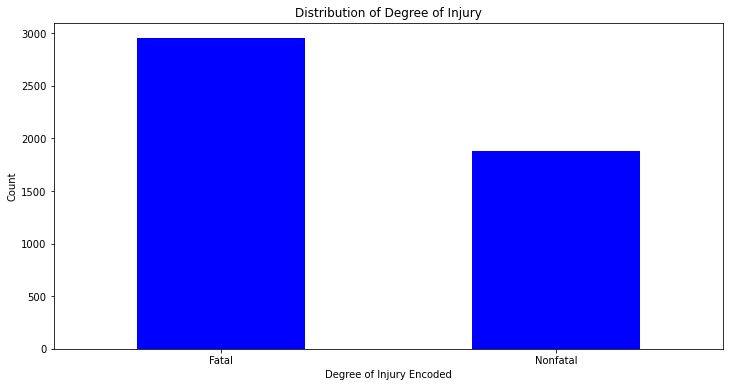

In [455]:
# Getting value counts
value_counts = df_clean['Degree of Injury'].value_counts()

# Plotting
plt.figure(figsize=(12,6))
value_counts.plot(kind='bar', color= 'blue')
plt.title('Distribution of Degree of Injury')
plt.xlabel('Degree of Injury Encoded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [50]:
value_counts

Fatal       2954
Nonfatal    1878
Name: Degree of Injury, dtype: int64

The data exhibits a moderate class imbalance with 61% fatal injuries and 39% non-fatal. This skew can impact the model predictions. Depending on the baseline model evaluation, appropriate techniques will be employed to address this imbalance.

#####  Number of Incidents Over Time

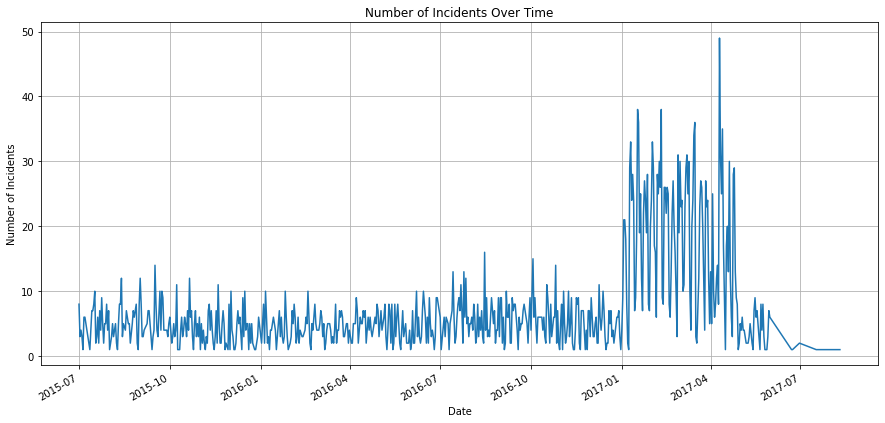

In [51]:
# Counting the number of incidents on each date
incidents_over_time = df_clean['Event Date'].value_counts().sort_index()

# Plotting the time series data
plt.figure(figsize=(15, 7))
incidents_over_time.plot()
plt.title('Number of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

In [52]:
# 1. The highest number of incidents on a single day.
max_incidents = incidents_over_time.max()

# 2. The date when the highest number of incidents occurred.
date_max_incidents = incidents_over_time.idxmax()

# 3. The lowest number of incidents on a single day (excluding days with zero incidents).
min_incidents = incidents_over_time[incidents_over_time > 0].min()

# 4. The date when the lowest number of incidents occurred (excluding days with zero incidents).
date_min_incidents = incidents_over_time[incidents_over_time > 0].idxmin()

# Printing the extracted values
print(f"Maximum number of incidents on a single day: {max_incidents} on {date_max_incidents}")
print(f"Minimum number of incidents on a single day (excluding zeros): {min_incidents} on {date_min_incidents}")


Maximum number of incidents on a single day: 49 on 2017-04-10 00:00:00
Minimum number of incidents on a single day (excluding zeros): 1 on 2015-07-05 00:00:00


In [53]:
# Extracting month and year from 'Event Date'
df_clean['Year'] = df_clean['Event Date'].dt.year
df_clean['Month'] = df_clean['Event Date'].dt.month

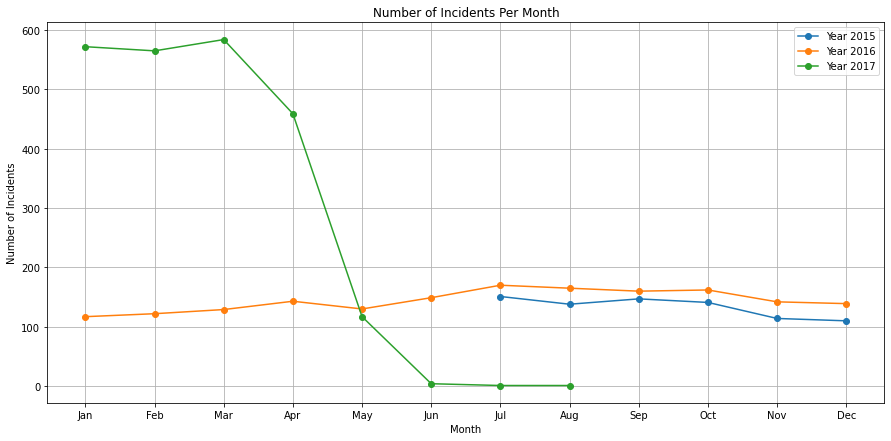

In [54]:
# Grouping by Year and Month to count incidents
monthly_incidents = df_clean.groupby(['Year', 'Month']).size().reset_index(name='Incident_Count')

# Plotting
plt.figure(figsize=(15, 7))
for year in monthly_incidents['Year'].unique():
    subset = monthly_incidents[monthly_incidents['Year'] == year]
    plt.plot(subset['Month'], subset['Incident_Count'], label=f'Year {year}', marker='o')

plt.title('Number of Incidents Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

The time series plots illustrate the frequency of incidents over time. Notably, the highest number of incidents on a single day was recorded as 49 on April 10, 2017. Conversely, the lowest count (excluding days with no incidents) was just a single incident on July 5, 2015. A notable trend observed is the increased frequency of accidents between January 2017 and April 2017, signifying this period as particularly incident-prone compared to other periods. It is imoprtant to notate that as time progresses, the likelihood of construction accident decreases.

## Model Selection and Evaluation

In this section, we will explore a range of machine learning models to predict construction accident severity. Our goal is to identify the most effective model for this task and assess its performance.

#### Data Splitting

We will split the data into training and test sets, reserving 20% of the data for testing, while ensuring that both sets have a similar distribution of our target classes, 'Fatal' and 'Nonfatal'.
To evaluate the performance of our models, we'll employ cross-validation. This technique provides a more comprehensive assessment by using different portions of the data for training and validation.
After determining the best model through cross-validation, we will then test its performance using the reserved test data. This final evaluation will give us insights into how our selected model is expected to perform on new, unseen data in real-world scenarios.

In [55]:
# Defining target and features
X = df_clean.drop(columns=['Degree of Injury', 'Abstract Text', 'Event Description', 'Event Keywords', 'summary_nr'])
y = df_clean['Degree of Injury']

# Converting target into binary labels
y = y.map({'Nonfatal': 0, 'Fatal': 1})

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Encoding - Changing Categorical To Numerical.

In [56]:
X_train = X_train.copy()
X_test = X_test.copy()

# Encoding the 'Event Date' into 'Year', 'Month', and 'Day' for better suit in ML
X_train['Year'] = X_train['Event Date'].dt.year
X_train['Month'] = X_train['Event Date'].dt.month
X_train['Day'] = X_train['Event Date'].dt.day

X_test['Year'] = X_test['Event Date'].dt.year
X_test['Month'] = X_test['Event Date'].dt.month
X_test['Day'] = X_test['Event Date'].dt.day

# Dropping the 'Event Date' column
X_train = X_train.drop(columns=['Event Date'])
X_test = X_test.drop(columns=['Event Date'])

# Applying the ColumnTransformer to encode categorical and binary features
categorical_features = ["Nature of Injury", "Part of Body", "Event type", "Environmental Factor", "Human Factor"]
binary_features = ["Task Assigned"]

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop=None, sparse=False, handle_unknown='ignore'), categorical_features),
        ('binary', OrdinalEncoder(), binary_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

### Baseline Model

We begin the process of building a predictive model for construction accident severity. Our initial step is to create a baseline model using a subset of features, primarily numerical and categorical variables. This model will serve as a starting point for our analysis and allow us to establish a performance baseline.

In [57]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_preprocessed)

# Creating a new logistic regression model
lr_cv = LogisticRegression(random_state=42, max_iter=1000)

# Using cross_val_score to get the performance metrics for each fold
accuracies = cross_val_score(lr_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
precision_scores = cross_val_score(lr_cv, X_train_scaled, y_train, cv=5, scoring='precision')
recall_scores = cross_val_score(lr_cv, X_train_scaled, y_train, cv=5, scoring='recall')
f1_scores = cross_val_score(lr_cv, X_train_scaled, y_train, cv=5, scoring='f1')
roc_auc_scores = cross_val_score(lr_cv, X_train_scaled, y_train, cv=5, scoring='roc_auc')

# Printing out the mean and standard deviation of the metrics
print(f"Mean CV Accuracy: {accuracies.mean()}")
print(f"Standard Deviation of CV Accuracy: {accuracies.std()}")
print()

print("Mean Precision:", precision_scores.mean())
print("Standard Deviation of Precision:", precision_scores.std())
print()

print("Mean Recall:", recall_scores.mean())
print("Standard Deviation of Recall:", recall_scores.std())
print()

print("Mean F1-Score:", f1_scores.mean())
print("Standard Deviation of F1-Score:", f1_scores.std())
print()

print("Mean ROC-AUC:", roc_auc_scores.mean())
print("Standard Deviation of ROC-AUC:", roc_auc_scores.std())
print()

Mean CV Accuracy: 0.9120310478654593
Standard Deviation of CV Accuracy: 0.015928324938288614

Mean Precision: 0.9274901649481582
Standard Deviation of Precision: 0.01482183195773859

Mean Recall: 0.9288986634177805
Standard Deviation of Recall: 0.018093302740392704

Mean F1-Score: 0.9280879920357952
Standard Deviation of F1-Score: 0.013203168247678577

Mean ROC-AUC: 0.9686519221154617
Standard Deviation of ROC-AUC: 0.005312543583569465



The Logistic Regression model witohout data text features demonstrates strong performance on the training data, with an average accuracy of approximately 91.20%. The model showcases consistency across different metrics, with precision and recall values around 92.75% and 92.89% respectively, indicating a balanced identification of positive instances. The F1-Score further confirms this balance at about 92.80%. Notably, the ROC-AUC score, at 96.87%, highlights the model's robust capability to distinguish between positive and negative classes. These metrics, combined with their low standard deviations, suggest a reliable and effective model. 

### Incorporating text data into our machine learning model

Text data, including the 'Abstract Text',  'Event Description' and 'Event Keywords' columns hold valuable information that can enhance the accuracy of our construction accident severity prediction model. In this section, we will explore the process of integrating natural language processing (NLP) techniques to leverage this textual information.

#####  Text Processing

In [60]:
# Creating a combined_text column
df_clean['combined_text'] = df_clean['Abstract Text'] + ' ' + df_clean['Event Description'] + ' ' + df_clean['Event Keywords']
columns_to_drop = ['Abstract Text', 'Event Description', 'Event Keywords', 'summary_nr']
df_clean = df_clean.drop(columns=columns_to_drop)

In [61]:
# Updating the features to include the new 'combined_text' column.
X = df_clean.drop(columns=['Degree of Injury'])

In [62]:
# Performing a new train-test split with the updates.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [63]:
# Converting the combined text into a matrix of TF-IDF features.
tfidf = TfidfVectorizer(max_features=5000, stop_words='english') 
X_text_tfidf_train = tfidf.fit_transform(X_train['combined_text'])
X_text_tfidf_test = tfidf.transform(X_test['combined_text'])

In [64]:
# Dropping 'combined_text' column
X_train = X_train.drop(columns=['combined_text'])
X_test = X_test.drop(columns=['combined_text'])

In [65]:
# Concatenating the TF-IDF vectors with the previously preprocessed data
X_train_full = hstack([X_train_preprocessed, X_text_tfidf_train])
X_test_full = hstack([X_test_preprocessed, X_text_tfidf_test])

#####  Modeling

In [66]:
# Scaling the data
scaler = StandardScaler(with_mean=False)  
X_train_scaled_full = scaler.fit_transform(X_train_full)
X_test_scaled_full = scaler.transform(X_test_full)

# Creating a new logistic regression model
lr_cv_full = LogisticRegression(random_state=42, max_iter=5000)

# Using cross_val_score to get the performance metrics for each fold
accuracies_full = cross_val_score(lr_cv_full, X_train_scaled_full, y_train, cv=5, scoring='accuracy')
precision_scores_full = cross_val_score(lr_cv_full, X_train_scaled_full, y_train, cv=5, scoring='precision')
recall_scores_full = cross_val_score(lr_cv_full, X_train_scaled_full, y_train, cv=5, scoring='recall')
f1_scores_full = cross_val_score(lr_cv_full, X_train_scaled_full, y_train, cv=5, scoring='f1')
roc_auc_scores_full = cross_val_score(lr_cv_full, X_train_scaled_full, y_train, cv=5, scoring='roc_auc')

# Printing out the mean and standard deviation of the metrics
print(f"Mean CV Accuracy with Text Data: {accuracies_full.mean()}")
print(f"Standard Deviation of CV Accuracy with Text Data: {accuracies_full.std()}")
print()

print("Mean Precision with Text Data:", precision_scores_full.mean())
print("Standard Deviation of Precision with Text Data:", precision_scores_full.std())
print()

print("Mean Recall with Text Data:", recall_scores_full.mean())
print("Standard Deviation of Recall with Text Data:", recall_scores_full.std())
print()

print("Mean F1-Score with Text Data:", f1_scores_full.mean())
print("Standard Deviation of F1-Score with Text Data:", f1_scores_full.std())
print()

print("Mean ROC-AUC with Text Data:", roc_auc_scores_full.mean())
print("Standard Deviation of ROC-AUC with Text Data:", roc_auc_scores_full.std())

Mean CV Accuracy with Text Data: 0.954980595084088
Standard Deviation of CV Accuracy with Text Data: 0.007692661706245036

Mean Precision with Text Data: 0.9536101063174943
Standard Deviation of Precision with Text Data: 0.006151502224995646

Mean Recall with Text Data: 0.9737691260257284
Standard Deviation of Recall with Text Data: 0.01022576256328454

Mean F1-Score with Text Data: 0.963552744005348
Standard Deviation of F1-Score with Text Data: 0.006328106301983464

Mean ROC-AUC with Text Data: 0.9825442805781789
Standard Deviation of ROC-AUC with Text Data: 0.0023842281823628258


The refined model, which integrates text data, displays a remarkable performance with a mean accuracy of 95.54%. This means that for approximately 96 out of every 100 construction accidents, the model aptly predicts the degree of injury. Boasting an F1-score of 96.35%, the model strikes a harmonious balance between precision (95.36%) and recall (97.38%). This balance suggests a reduced number of incorrect predictions. Moreover, an ROC-AUC score of 0.9825 reiterates the model's stellar ability to discern between fatal and nonfatal incidents.

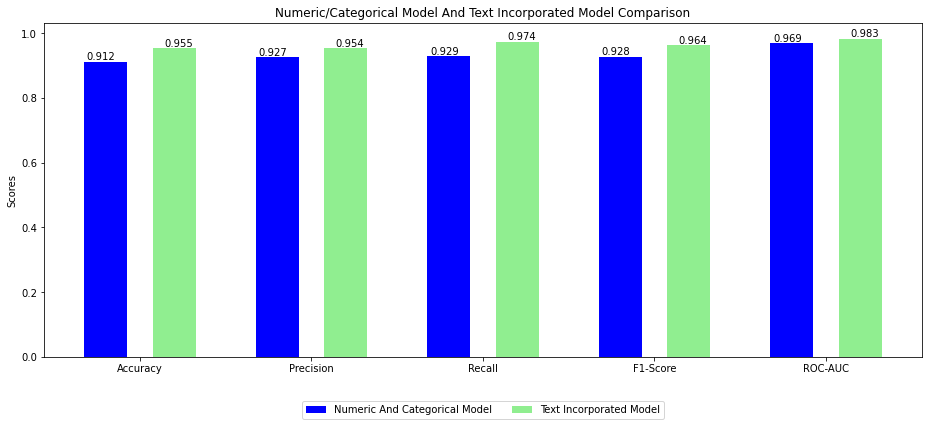

In [451]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
Numeric_And_Categorical_Model = [0.912, 0.927, 0.929, 0.928, 0.969]
Text_Incorporated_Model = [0.955, 0.954, 0.974, 0.964, 0.983]

x = np.arange(len(metrics))  # the label locations
bar_width = 0.25  # Width of each bar

fig, ax = plt.subplots(figsize=(13, 6))

rects1 = ax.bar(x - width/2 - 0.1, Numeric_And_Categorical_Model, bar_width, label='Numeric And Categorical Model', color='blue', alpha=1)
rects2 = ax.bar(x + width/2 + 0.1, Text_Incorporated_Model, bar_width, label='Text Incorporated Model', color='lightgreen', alpha=1)

ax.set_ylabel('Scores')
ax.set_title('Numeric/Categorical Model And Text Incorporated Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)


for i in range(len(metrics)):
    ax.text(x[i] - bar_width/2 -0.1, Numeric_And_Categorical_Model[i] + 0.005, f'{Numeric_And_Categorical_Model[i]:.3f}', ha='center')
    ax.text(x[i] + bar_width/2 +0.1, Text_Incorporated_Model[i] + 0.005, f'{Text_Incorporated_Model[i]:.3f}', ha='center')

fig.tight_layout()
plt.show()

In comparison with the model without text features, integrating textual features has clearly uplifted its predictive prowess. The accuracy jumped from 91.20% to 95.40%. Both precision and recall witnessed substantial improvements, leading to fewer misclassifications. The escalation of the F1-score from 0.9280 to 0.9635 highlights the benefits of embracing text data in the modeling process. Furthermore, the ROC-AUC score, previously impressive at 0.9687, has now soared to an even higher benchmark of 0.9825, emphasizing the enhanced capabilities of this iteration in distinguishing between classes.

#### Model Refinement with Custom Stopwords

In [67]:
# TF-IDF Feature Extraction
# Getting the sum of each word's TF-IDF score across all documents
sum_tfidf = X_text_tfidf_train.sum(axis=0) 

# Converting the sum to an array and match it with words
words_freq = [(word, sum_tfidf[0, idx]) for word, idx in tfidf.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

# Displaying the top 50 words
for word, freq in words_freq[:50]: 
    print(word, freq)

employee 402.61017183237203
struck 150.08970025245196
killed 149.93605155343164
fall 129.53999078194965
truck 118.22379667804874
ladder 113.685238773136
head 106.11147478195022
roof 95.2017880518533
finger 94.45826329766749
fell 87.79429787730047
2017 87.08167057352006
2016 84.66891222195535
caught 83.36828699233527
approximately 83.05925311340012
machine 82.843419865885
vehicle 78.0938426006613
tree 76.80680839648355
00 73.98701038674578
30 73.29747025078105
crushed 72.68120193056782
falls 64.99488830042999
trailer 64.55316481014567
hand 61.597023836909564
feet 60.23932338311165
heart 59.83075850378817
hospitalized 57.790349685569836
injuries 56.57464393396251
worker 55.53796706904291
10 55.235590776555824
amputated 55.206389879113466
fracture 54.66930857296582
floor 54.53203206121477
forklift 54.48523113053902
working 53.06883467762807
attack 52.35845909597303
leg 51.52425731551415
15 51.20567038036774
concrete 50.85225156316009
2015 50.49041760534149
saw 50.40623302991416
falling 49

In [75]:
#Text Processing
# Creating a severity-related words list to stopwords
severity_stopwords = ["killed", "died", "dead"]
custom_stopwords = text.ENGLISH_STOP_WORDS.union(severity_stopwords)

# Updating the features to include the new 'combined_text' column.
X = df_clean.drop(columns=['Degree of Injury'])

# Performing a new train-test split with the updates.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Converting the combined text into a matrix of TF-IDF features with custom stopwords
tfidf = TfidfVectorizer(max_features=5000, stop_words=custom_stopwords) 
X_text_tfidf_train = tfidf.fit_transform(X_train['combined_text'])
X_text_tfidf_test = tfidf.transform(X_test['combined_text'])

# Concatenating the TF-IDF vectors with the previously preprocessed data
X_train_full_no_severity = hstack([X_train_preprocessed, X_text_tfidf_train])
X_test_full_no_severity = hstack([X_test_preprocessed, X_text_tfidf_test])

In [76]:
# Modeling
# Scaling the data
scaler = StandardScaler(with_mean=False)  
X_train_scaled_full_no_severity = scaler.fit_transform(X_train_full_no_severity)
X_test_scaled_full_no_severity = scaler.transform(X_test_full_no_severity)

# Creating a new logistic regression model
lr_cv_full = LogisticRegression(random_state=42, max_iter=5000)

# Using cross_val_score to get the performance metrics for each fold
accuracies_full = cross_val_score(lr_cv_full, X_train_full_no_severity, y_train, cv=5, scoring='accuracy')
precision_scores_full = cross_val_score(lr_cv_full, X_train_full_no_severity, y_train, cv=5, scoring='precision')
recall_scores_full = cross_val_score(lr_cv_full, X_train_full_no_severity, y_train, cv=5, scoring='recall')
f1_scores_full = cross_val_score(lr_cv_full, X_train_full_no_severity, y_train, cv=5, scoring='f1')
roc_auc_scores_full = cross_val_score(lr_cv_full, X_train_full_no_severity, y_train, cv=5, scoring='roc_auc')

# Printing out the mean and standard deviation of the metrics
print(f"Mean CV Accuracy with Text Data: {accuracies_full.mean()}")
print(f"Standard Deviation of CV Accuracy with Text Data: {accuracies_full.std()}")
print()

print("Mean Precision with Text Data:", precision_scores_full.mean())
print("Standard Deviation of Precision with Text Data:", precision_scores_full.std())
print()

print("Mean Recall with Text Data:", recall_scores_full.mean())
print("Standard Deviation of Recall with Text Data:", recall_scores_full.std())
print()

print("Mean F1-Score with Text Data:", f1_scores_full.mean())
print("Standard Deviation of F1-Score with Text Data:", f1_scores_full.std())
print()

print("Mean ROC-AUC with Text Data:", roc_auc_scores_full.mean())
print("Standard Deviation of ROC-AUC with Text Data:", roc_auc_scores_full.std())

Mean CV Accuracy with Text Data: 0.9319534282018112
Standard Deviation of CV Accuracy with Text Data: 0.008041537007979336

Mean Precision with Text Data: 0.9326742408293569
Standard Deviation of Precision with Text Data: 0.012353633384578091

Mean Recall with Text Data: 0.9581001182499016
Standard Deviation of Recall with Text Data: 0.010500762038368727

Mean F1-Score with Text Data: 0.9451196627737355
Standard Deviation of F1-Score with Text Data: 0.006339511706416702

Mean ROC-AUC with Text Data: 0.9760589031255172
Standard Deviation of ROC-AUC with Text Data: 0.0050099732549421195


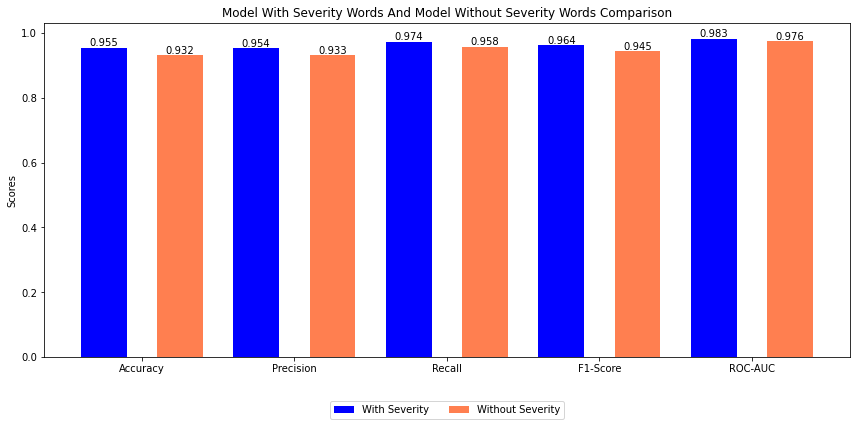

In [411]:
import numpy as np
import matplotlib.pyplot as plt

# Data for model with severity
metrics_with_severity = {
    "Accuracy": [0.954980595084088, 0.007692661706245036],
    "Precision": [0.9536101063174943, 0.006151502224995646],
    "Recall": [0.9737691260257284, 0.01022576256328454],
    "F1-Score": [0.963552744005348, 0.006328106301983464],
    "ROC-AUC": [0.9825442805781789, 0.0023842281823628258]
}

# Data for the second model without severity
metrics_without_severity = {
    "Accuracy": [0.9319534282018112, 0.008041537007979336],
    "Precision": [0.9326742408293569, 0.012353633384578091],
    "Recall": [0.9581001182499016, 0.010500762038368727],
    "F1-Score": [0.9451196627737355, 0.006339511706416702],
    "ROC-AUC": [0.9760589031255172, 0.0050099732549421195]
}

labels = list(metrics_with_severity.keys())
with_severity_means = [m[0] for m in metrics_with_severity.values()]
without_severity_means = [m[0] for m in metrics_without_severity.values()]

with_severity_stds = [m[1] for m in metrics_with_severity.values()]
without_severity_stds = [m[1] for m in metrics_without_severity.values()]

x = np.arange(len(metrics)) 
width = 0.3

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2 - 0.1, with_severity_means, width, label='With Severity', color='blue', alpha=1, capsize=5)
rects2 = ax.bar(x + width/2 + 0.1, without_severity_means, width, label='Without Severity', color='coral', alpha=1, capsize=5)

ax.set_ylabel('Scores')
ax.set_title('Model With Severity Words And Model Without Severity Words Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)

for i in range(len(labels)):
    ax.text(x[i] - width/2 - 0.1, with_severity_means[i] + 0.005, f'{with_severity_means[i]:.3f}', ha='center')
    ax.text(x[i] + width/2 + 0.1, without_severity_means[i] + 0.005, f'{without_severity_means[i]:.3f}', ha='center')

fig.tight_layout()
plt.show()

While comparing the two models, the differences in performance metrics are not substantial. Although the model with all words exhibits marginally better results across all metrics, the deviation is relatively slight. For the sake of maintaining transparency in our predictions and understanding the factors influencing the severity determination, we have decided to continue working with the model that includes all words. This approach ensures a comprehensive utilization of the data and promotes a more transparent modeling process.

For future enhancements, we plan to explore the Random Forest algorithm. Renowned for its robustness, Random Forest may offer better results by effectively leveraging both structured and unstructured features present in our dataset.

### Random Forest Model 

In [79]:
# Creating a Random Forest classifier
rf_cv_full = RandomForestClassifier(random_state=42, n_estimators=100)

# Using cross_val_score to get the performance metrics for each fold
accuracies_rf_full = cross_val_score(rf_cv_full, X_train_scaled_full, y_train, cv=5, scoring='accuracy')
precision_scores_rf_full = cross_val_score(rf_cv_full, X_train_scaled_full, y_train, cv=5, scoring='precision')
recall_scores_rf_full = cross_val_score(rf_cv_full, X_train_scaled_full, y_train, cv=5, scoring='recall')
f1_scores_rf_full = cross_val_score(rf_cv_full, X_train_scaled_full, y_train, cv=5, scoring='f1')
roc_auc_scores_rf_full = cross_val_score(rf_cv_full, X_train_scaled_full, y_train, cv=5, scoring='roc_auc')

# Printing out the mean and standard deviation of the metrics
print(f"Mean CV Accuracy with Random Forest and Text Data: {accuracies_rf_full.mean()}")
print(f"Standard Deviation of CV Accuracy with Random Forest and Text Data: {accuracies_rf_full.std()}")
print()
print(f"Mean Precision with Random Forest and Text Data: {precision_scores_rf_full.mean()}")
print(f"Standard Deviation of Precision with Random Forest and Text Data: {precision_scores_rf_full.std()}")
print()
print(f"Mean Recall with Random Forest and Text Data: {recall_scores_rf_full.mean()}")
print(f"Standard Deviation of Recall with Random Forest and Text Data: {recall_scores_rf_full.std()}")
print()
print(f"Mean F1-Score with Random Forest and Text Data: {f1_scores_rf_full.mean()}")
print(f"Standard Deviation of F1-Score with Random Forest and Text Data: {f1_scores_rf_full.std()}")
print()
print(f"Mean ROC-AUC with Random Forest and Text Data: {roc_auc_scores_rf_full.mean()}")
print(f"Standard Deviation of ROC-AUC with Random Forest and Text Data: {roc_auc_scores_rf_full.std()}")

Mean CV Accuracy with Random Forest and Text Data: 0.9725743855109961
Standard Deviation of CV Accuracy with Random Forest and Text Data: 0.006717078905949364

Mean Precision with Random Forest and Text Data: 0.966575129333941
Standard Deviation of Precision with Random Forest and Text Data: 0.00825280600578769

Mean Recall with Random Forest and Text Data: 0.9894229046475795
Standard Deviation of Recall with Random Forest and Text Data: 0.004818688064349446

Mean F1-Score with Random Forest and Text Data: 0.977847490823686
Standard Deviation of F1-Score with Random Forest and Text Data: 0.005365426680923803

Mean ROC-AUC with Random Forest and Text Data: 0.9886664806747583
Standard Deviation of ROC-AUC with Random Forest and Text Data: 0.0026457387127022712


The Random Forest model shows a slight edge in all metrics compared to our logistic regression model. However, its performance seems to vary a bit more across different data folds, as indicated by the slightly higher standard deviations.

Moving forward, we will try implementing the XGBoost model to see if it offers any improvements.

### XGBoost

In [121]:
# Defining the model
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Training the model
xgb_classifier.fit(X_train_scaled_full, y_train)

# Cross-validation
xgb_accuracies = cross_val_score(xgb_classifier, X_train_scaled_full, y_train, cv=5, scoring='accuracy')
xgb_precision = cross_val_score(xgb_classifier, X_train_scaled_full, y_train, cv=5, scoring='precision')
xgb_recall = cross_val_score(xgb_classifier, X_train_scaled_full, y_train, cv=5, scoring='recall')
xgb_f1 = cross_val_score(xgb_classifier, X_train_scaled_full, y_train, cv=5, scoring='f1')
xgb_roc_auc = cross_val_score(xgb_classifier, X_train_scaled_full, y_train, cv=5, scoring='roc_auc')

# Printing metrics
print("Mean CV Accuracy with XGBoost:", xgb_accuracies.mean())
print("Mean CV Precision with XGBoost:", xgb_precision.mean())
print("Mean CV Recall with XGBoost:", xgb_recall.mean())
print("Mean CV F1-Score with XGBoost:", xgb_f1.mean())
print("Mean CV ROC-AUC with XGBoost:", xgb_roc_auc.mean())

Mean CV Accuracy with XGBoost: 0.9790426908150065
Mean CV Precision with XGBoost: 0.9814665056548673
Mean CV Recall with XGBoost: 0.9843417422152149
Mean CV F1-Score with XGBoost: 0.9828903681268504
Mean CV ROC-AUC with XGBoost: 0.987892690347361


The XGBoost model demonstrates impressive performance across different evaluation metrics in our cross-validation. Specifically, the model achieves an accuracy of approximately 96.12%, suggesting that it correctly predicts outcomes in the majority of cases. The precision of 98.14% indicates that when the model predicts a positive class, it's accurate about 97.90% of the time. An even more impressive recall of 98.43% implies that the model is able to correctly identify about 98.43% of all actual positive instances. The F1-Score, which is a harmonized measure of precision and recall, stands at approximately 98.29%, further underscoring the model's balanced performance. Lastly, a ROC-AUC of about 98.79% shows the model's capability to distinguish between the positive and negative classes.

Given the promising results of the individual models we've tested, including XGBoost, we are now inclined to explore the stacking ensemble model. This approach combines predictions from multiple models, potentially offering even better performance by capitalizing on the strengths of each individual model.

### Stacking Ensemble Method

In [122]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Placeholder for out-of-fold predictions
oof_lr = np.zeros(X_train_scaled_full.shape[0])
oof_rf = np.zeros(X_train_scaled_full.shape[0])
oof_xgb = np.zeros(X_train_scaled_full.shape[0])

In [123]:
for train_index, valid_index in kf.split(X_train_scaled_full, y_train):
    X_train_fold, X_valid_fold = X_train_scaled_full[train_index], X_train_scaled_full[valid_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

    # Train Logistic Regression and predict on the validation set
    lr_cv_full.fit(X_train_fold, y_train_fold)
    oof_lr[valid_index] = lr_cv_full.predict_proba(X_valid_fold)[:, 1]

    # Train Random Forest and predict on the validation set
    rf_cv_full.fit(X_train_fold, y_train_fold)
    oof_rf[valid_index] = rf_cv_full.predict_proba(X_valid_fold)[:, 1]

    # Train XGBoost and predict on the validation set
    xgb_classifier.fit(X_train_fold, y_train_fold)
    oof_xgb[valid_index] = xgb_classifier.predict_proba(X_valid_fold)[:, 1]

In [124]:
# Combining OOF predictions to serve as new features
stacked_features_train = np.column_stack((oof_lr, oof_rf, oof_xgb))

# Training a meta-model on the stacked features
meta_model = LogisticRegression(random_state=42)
meta_model.fit(stacked_features_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
# Cross-validation metrics for the meta-model
accuracy_scores = cross_val_score(meta_model, stacked_features_train, y_train, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(meta_model, stacked_features_train, y_train, cv=kf, scoring='precision')
recall_scores = cross_val_score(meta_model, stacked_features_train, y_train, cv=kf, scoring='recall')
f1_scores = cross_val_score(meta_model, stacked_features_train, y_train, cv=kf, scoring='f1')
roc_auc_scores = cross_val_score(meta_model, stacked_features_train, y_train, cv=kf, scoring='roc_auc')

# Printing out the performance metrics
print(f"Mean CV Accuracy of Stacked Model: {accuracy_scores.mean()}")
print(f"Standard Deviation of CV Accuracy of Stacked Model: {accuracy_scores.std()}")
print()
print(f"Mean CV Precision of Stacked Model: {precision_scores.mean()}")
print(f"Standard Deviation of CV Precision of Stacked Model: {precision_scores.std()}")
print()
print(f"Mean CV Recall of Stacked Model: {recall_scores.mean()}")
print(f"Standard Deviation of CV Recall of Stacked Model: {recall_scores.std()}")
print()
print(f"Mean CV F1-Score of Stacked Model: {f1_scores.mean()}")
print(f"Standard Deviation of CV F1-Score of Stacked Model: {f1_scores.std()}")
print()
print(f"Mean CV ROC-AUC of Stacked Model: {roc_auc_scores.mean()}")
print(f"Standard Deviation of CV ROC-AUC of Stacked Model: {roc_auc_scores.std()}")

Mean CV Accuracy of Stacked Model: 0.9816300129366106
Standard Deviation of CV Accuracy of Stacked Model: 0.0028811199807658593

Mean CV Precision of Stacked Model: 0.9811227191972105
Standard Deviation of CV Precision of Stacked Model: 0.0034269390549365774

Mean CV Recall of Stacked Model: 0.9889973841688464
Standard Deviation of CV Recall of Stacked Model: 0.0031071958116059245

Mean CV F1-Score of Stacked Model: 0.9850389728089324
Standard Deviation of CV F1-Score of Stacked Model: 0.0023335758013600873

Mean CV ROC-AUC of Stacked Model: 0.9917764820910268
Standard Deviation of CV ROC-AUC of Stacked Model: 0.0025400055474492146


The stacked ensemble model has outperformed the other models in all of the metrics. This showcases the power of ensemble methods.The standard deviations for the individual models and the ensemble indicate that the models' performances are consistent across different folds of the cross-validation. Still, the ensemble method's slightly improved metrics demonstrate the effectiveness of combining the strengths of different models to counteract their individual weaknesses.

While our ensemble model has shown commendable results, there is always room for further optimization. To ensure we are extracting the maximum performance from our ensemble model, we will proceed with hyperparameter tuning using GridSearchCV.

#### Hyperparameter Tuning On The Ensemble Model Using GridSearchCV 

In [85]:
# Base models
estimators = [
    ('lr', lr_cv_full),  
    ('rf', rf_cv_full),
    ('xgb', xgb_classifier)
]

# Stacking Classifier
stacked_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42))

# Parameter grid for the meta-model (logistic regression)
param_grid = {
    'final_estimator__C': [0.01, 0.1, 1, 10, 100],
    'final_estimator__penalty': ['l2'],  
    'final_estimator__solver': ['lbfgs'] 
}

# Grid Search setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(stacked_model, param_grid, cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled_full, y_train)

# Results
print("Best parameters for stacked model: ", grid_search.best_params_)
print("Best cross-validation score for stacked model: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.6min finished


Best parameters for stacked model:  {'final_estimator__C': 0.1, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'lbfgs'}
Best cross-validation score for stacked model: 0.98


In [86]:
best_stacked_model = grid_search.best_estimator_

# Cross-validated Accuracy
accuracy_scores = cross_val_score(best_stacked_model, X_train_scaled_full, y_train, cv=kf, scoring='accuracy')

# Cross-validated Precision
precision_scores = cross_val_score(best_stacked_model, X_train_scaled_full, y_train, cv=kf, scoring='precision')

# Cross-validated Recall
recall_scores = cross_val_score(best_stacked_model, X_train_scaled_full, y_train, cv=kf, scoring='recall')

# Cross-validated F1-Score
f1_scores = cross_val_score(best_stacked_model, X_train_scaled_full, y_train, cv=kf, scoring='f1')

# Cross-validated ROC-AUC
roc_auc_scores = cross_val_score(best_stacked_model, X_train_scaled_full, y_train, cv=kf, scoring='roc_auc')

# Printing out the performance metrics
print(f"Mean CV Accuracy of Best Stacked Model: {accuracy_scores.mean()}")
print(f"Standard Deviation of CV Accuracy of Best Stacked Model: {accuracy_scores.std()}")
print()
print(f"Mean CV Precision of Best Stacked Model: {precision_scores.mean()}")
print(f"Standard Deviation of CV Precision of Best Stacked Model: {precision_scores.std()}")
print()
print(f"Mean CV Recall of Best Stacked Model: {recall_scores.mean()}")
print(f"Standard Deviation of CV Recall of Best Stacked Model: {recall_scores.std()}")
print()
print(f"Mean CV F1-Score of Best Stacked Model: {f1_scores.mean()}")
print(f"Standard Deviation of CV F1-Score of Best Stacked Model: {f1_scores.std()}")
print()
print(f"Mean CV ROC-AUC of Best Stacked Model: {roc_auc_scores.mean()}")
print(f"Standard Deviation of CV ROC-AUC of Best Stacked Model: {roc_auc_scores.std()}")

Mean CV Accuracy of Best Stacked Model: 0.9824062095730918
Standard Deviation of CV Accuracy of Best Stacked Model: 0.0025350475992581742

Mean CV Precision of Best Stacked Model: 0.9807421834190192
Standard Deviation of CV Precision of Best Stacked Model: 0.003269826491112646

Mean CV Recall of Best Stacked Model: 0.9906905077579102
Standard Deviation of CV Recall of Best Stacked Model: 0.0025361186661260085

Mean CV F1-Score of Best Stacked Model: 0.9856867673428737
Standard Deviation of CV F1-Score of Best Stacked Model: 0.0020462134392301365

Mean CV ROC-AUC of Best Stacked Model: 0.9917835207756374
Standard Deviation of CV ROC-AUC of Best Stacked Model: 0.0025655785190811355


### Models Comparison

In [129]:
# Converting models result to a data frame
data = {
    'Model': ["Logistic Regression with Text", "Random Forest with Text", "XGBoost", "Stacked", "Stacked (Tuned)"],
    
    'Accuracy': [0.954980595084088, 0.9725743855109961, 0.9790426908150065, 0.9816300129366106, 0.9824062095730918],
    
    'Precision': [0.9536101063174943, 0.966575129333941, 0.9814665056548673, 0.9811227191972105, 0.9807421834190192],
    
    'Recall': [0.9737691260257284, 0.9894229046475795, 0.9843417422152149, 0.9889973841688464, 0.9906905077579102],
    
    'F1-Score': [0.963552744005348, 0.977847490823686, 0.9828903681268504, 0.9850389728089324, 0.9856867673428737],
    
    'ROC-AUC': [0.9825442805781789, 0.9886664806747583, 0.987892690347361, 0.9917764820910268, 0.9917835207756374]
}

models_result = pd.DataFrame(data)

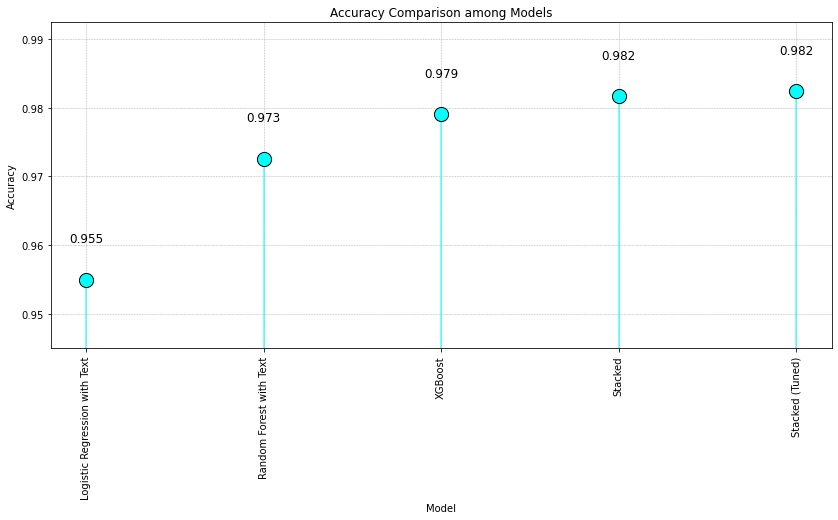

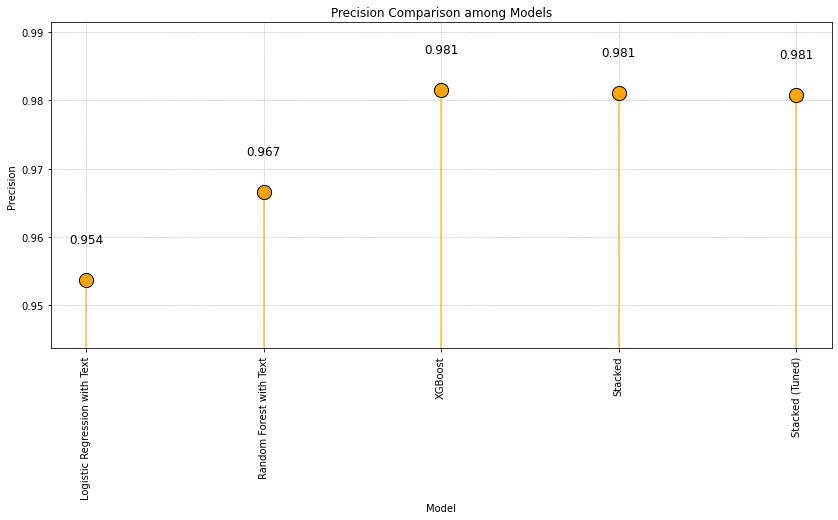

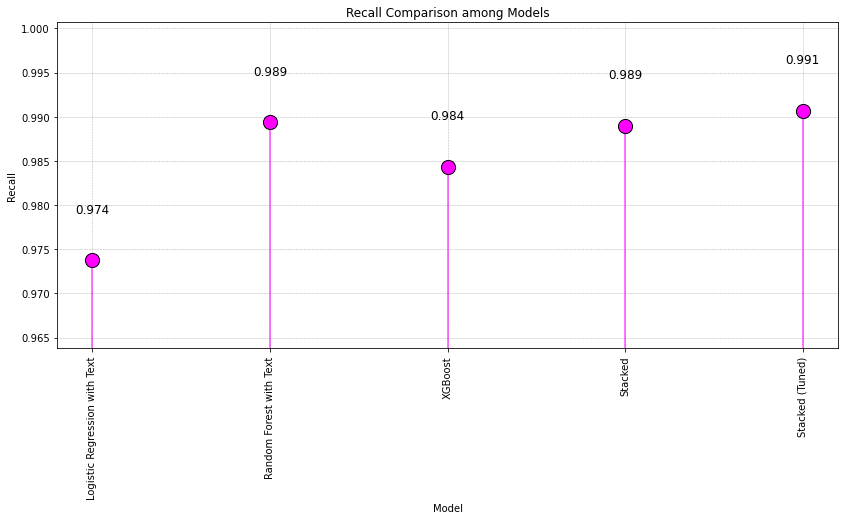

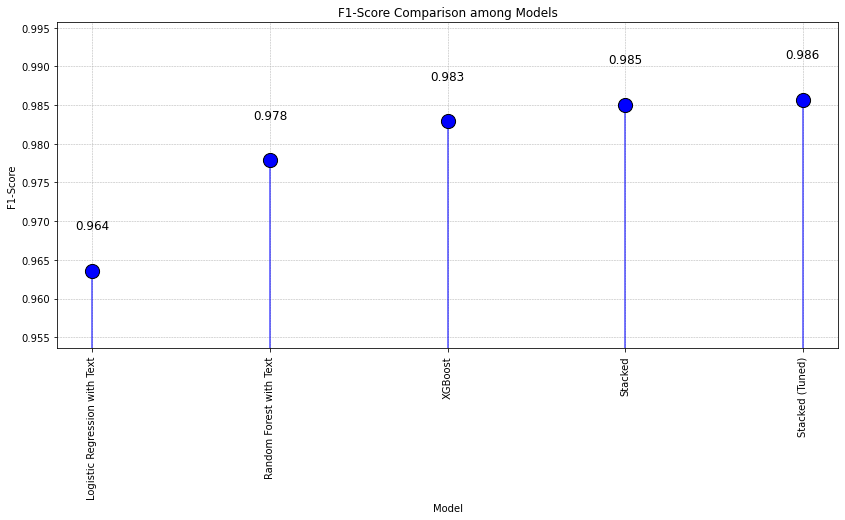

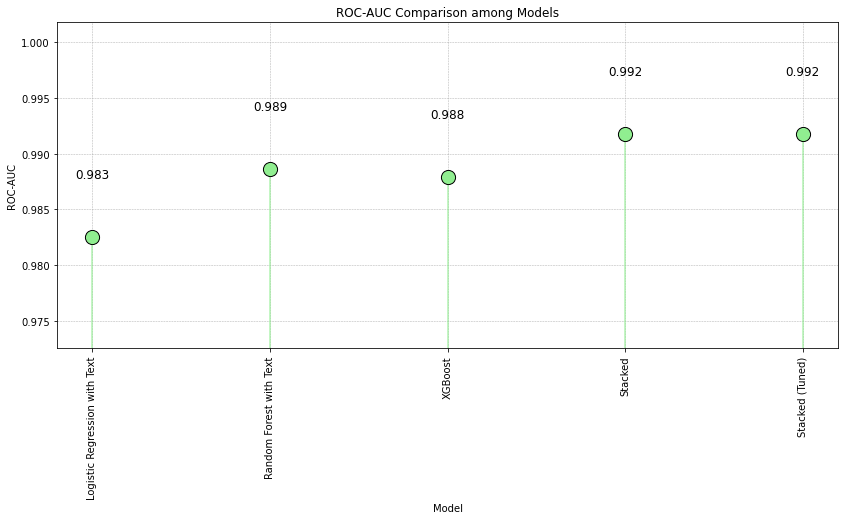

In [130]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['cyan', 'orange', 'magenta', 'blue', 'lightgreen']

for idx, metric in enumerate(metrics):
    plt.figure(figsize=(14, 6))
    
    # Plotting the lines
    for i, val in enumerate(models_result[metric]):
        plt.plot([models_result['Model'][i], models_result['Model'][i]], [0, val], color=colors[idx], alpha=0.7)
    
    # Plotting the dots 
    plt.scatter(models_result['Model'], models_result[metric], color=colors[idx], s=200, zorder=5, edgecolor='black', linewidth=1)
    
    # Adding text
    for i, val in enumerate(models_result[metric]):
        plt.text(models_result['Model'][i], val + 0.005, f"{val:.3f}", ha='center', va='bottom', fontsize=12)
    
    plt.title(f'{metric} Comparison among Models')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=90)
    plt.ylim(min(models_result[metric]) - 0.01, max(models_result[metric]) + 0.01)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

The Stacked Models - both tuned and non-tuned - clearly stand out as the top performers in our evaluation. They consistently outpace the individual Logistic Regression, Random Forest, and XGBoost models across all metrics, underscoring the strength and effectiveness of ensemble stacking in leveraging the strengths of multiple models. While the differences between the stacked models and XGBoost are relatively marginal, the advantage still leans towards the stacked approach. Interestingly, when comparing the tuned stacked model against its non-tuned counterpart, the distinctions in performance metrics are minimal. However, taking into consideration the efficiency of the modeling process, as well as the slightly better precision of the non-tuned version, we've decided to proceed with the non-tuned Stacked Model for our subsequent tasks. This decision not only prioritizes model performance but also ensures a streamlined and efficient modeling process.

### Evaluating the Non-Tuned Stacked Model  in the testing data

In [117]:
# Converting X_test_full from COO to CSR format to suit to XGBoost
X_test_full_csr = X_test_full.tocsr()

In [126]:
# Generating Test Predictions
test_lr = lr_cv_full.predict_proba(X_test_full_csr)[:, 1]
test_rf = rf_cv_full.predict_proba(X_test_full_csr)[:, 1]
test_xgb = xgb_classifier.predict_proba(X_test_full_csr)[:, 1]

In [127]:
# Stacking Test Predictions
stacked_features_test = np.column_stack((test_lr, test_rf, test_xgb))

In [128]:
y_pred = meta_model.predict(stacked_features_test)

# Metrics
print(f"Test Accuracy of Stacked Model: {accuracy_score(y_test, y_pred)}")
print(f"Test Precision of Stacked Model: {precision_score(y_test, y_pred)}")
print(f"Test Recall of Stacked Model: {recall_score(y_test, y_pred)}")
print(f"Test F1-Score of Stacked Model: {f1_score(y_test, y_pred)}")
print(f"Test ROC-AUC of Stacked Model: {roc_auc_score(y_test, meta_model.predict_proba(stacked_features_test)[:, 1])}")

Test Accuracy of Stacked Model: 0.8086866597724922
Test Precision of Stacked Model: 0.7622739018087855
Test Recall of Stacked Model: 0.9983079526226735
Test F1-Score of Stacked Model: 0.8644688644688644
Test ROC-AUC of Stacked Model: 0.9844565647838139


Despite the promising cross-validation results observed with our best-performing model, the stacked model, it exhibited a marked disparity when applied to the testing data. 
This discrepancy indicates that the correct predictions of the base models in the stacked approach are strongly correlated, reducing the benefits of stacking. Due to this correlation, the combined model may not offer the desired diversification in predictions. As a result, we believe that focusing on improving individual models might yield better results. Therefore, we will turn our attention to refining our second-best model, XGBoost. By tuning its parameters we aim to enhance its performance and subsequently evaluate its robustness on the testing data.

### Hyperparameter Tuning On The XGBoost Using GridSearch 

In [93]:
# XGBoost Classifier Initialization
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Hyperparameters Grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.7, 0.8, 0.9, 1],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Scoring dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}

# GridSearch with multiple scoring metrics
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, 
                           scoring=scoring, refit='accuracy',
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_scaled_full, y_train)
best_parameters = grid_search.best_params_
print(f"Best Parameters: {best_parameters}")

Fitting 5 folds for each of 6400 candidates, totalling 32000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


In [94]:
# Using the best parameters to train the model
best_xgb_classifier = xgb.XGBClassifier(**best_parameters, objective='binary:logistic', random_state=42)
best_xgb_classifier.fit(X_train_scaled_full, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
# Cross-validation
best_xgb_accuracies = cross_val_score(best_xgb_classifier, X_train_scaled_full, y_train, cv=5, scoring='accuracy')
best_xgb_precision = cross_val_score(best_xgb_classifier, X_train_scaled_full, y_train, cv=5, scoring='precision')
best_xgb_recall = cross_val_score(best_xgb_classifier, X_train_scaled_full, y_train, cv=5, scoring='recall')
best_xgb_f1 = cross_val_score(best_xgb_classifier, X_train_scaled_full, y_train, cv=5, scoring='f1')
best_xgb_roc_auc = cross_val_score(best_xgb_classifier, X_train_scaled_full, y_train, cv=5, scoring='roc_auc')

In [96]:
# Printing metrics
print("Mean CV Accuracy with Tuned XGBoost:", best_xgb_accuracies.mean())
print()
print("Mean CV Precision with Tuned XGBoost:", best_xgb_precision.mean())
print()
print("Mean CV Recall with Tuned XGBoost:", best_xgb_recall.mean())
print()
print("Mean CV F1-Score with Tuned XGBoost:", best_xgb_f1.mean())
print()
print("Mean CV ROC-AUC with Tuned XGBoost:", best_xgb_roc_auc.mean())

Mean CV Accuracy with Tuned XGBoost: 0.9811125485122899

Mean CV Precision with Tuned XGBoost: 0.9811025444763486

Mean CV Recall with Tuned XGBoost: 0.988149926541728

Mean CV F1-Score with Tuned XGBoost: 0.9846076807795512

Mean CV ROC-AUC with Tuned XGBoost: 0.9894951309365974


The tuned XGBoost model exhibits exceptional performance across all metrics, making it a potent tool for the dataset in consideration. The model not only predicts outcomes with high accuracy but also demonstrates a harmonious balance between precision and recall. Moreover, its ability to differentiate between classes is commendable. The hyperparameter tuning has evidently played a significant role in refining the model's predictions.

**Let's take a look at how the tuned XGBoost model performs in cross-validation compared to our stacked model.**

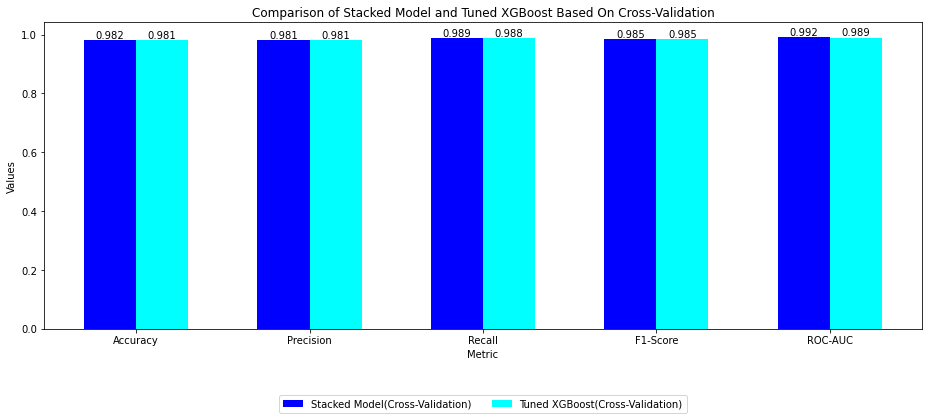

In [452]:
# The metrics and their values for both models based on cross-validation
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
stacked_values = [0.9816300129366106, 0.9811227191972105, 0.98899738416884647, 0.9850389728089324, 0.9917764820910268]
xgboost_values = [0.981112548512289, 0.981102544476348, 0.988149926541728, 0.9846076807795512, 0.9894951309365974]

# Setting the width of the bars and the positions
bar_width = 0.3
index = np.arange(len(metrics))

# Creating the plot
plt.figure(figsize=(13, 6))
bar1 = plt.bar(index, stacked_values, bar_width, label='Stacked Model(Cross-Validation)', color='blue', alpha=1)
bar2 = plt.bar(index + bar_width, xgboost_values, bar_width, label='Tuned XGBoost(Cross-Validation)', color='cyan', alpha=1)

# Inserting numbers
for idx, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height, '{:.3f}'.format(stacked_values[idx]), ha='center', va='bottom')
    
for idx, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height, '{:.3f}'.format(xgboost_values[idx]), ha='center', va='bottom')

# Setting the labels, title, and legend
plt.xlabel('Metric')
plt.ylabel('Values')
plt.title('Comparison of Stacked Model and Tuned XGBoost Based On Cross-Validation')
plt.xticks(index + bar_width / 2, metrics) 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2) 
plt.tight_layout()
plt.show()

Upon comparing the metrics of the Non-Tuned Stacked Model with the Tuned XGBoost in cross-validation, both models exhibit commendable performances. While the Stacked Model slightly edges out in most metrics, it's crucial to remember that this model didn't generalize well to the testing data. On the other hand, the Tuned XGBoost demonstrates slightly lower, yet competitive, cross-validation scores. Given the suboptimal performance of the Stacked Model on unseen data, the Tuned XGBoost model becomes our primary choice. Its reliable performance in cross-validation, combined with its expected better generalization to new data, make it a more trustworthy model for future predictions

### Evaluating the Tuned  XGBoost  in the testing data

In [98]:
# Predictions on the test set
y_pred_best_xgb = best_xgb_classifier.predict(X_test_scaled_full)
y_pred_proba_best_xgb = best_xgb_classifier.predict_proba(X_test_scaled_full)[:, 1]

# Calculating and printing the metrics
print(f"Test Accuracy with Tuned XGBoost: {accuracy_score(y_test, y_pred_best_xgb)}")
print(f"Test Precision with Tuned XGBoost: {precision_score(y_test, y_pred_best_xgb)}")
print(f"Test Recall with Tuned XGBoost: {recall_score(y_test, y_pred_best_xgb)}")
print(f"Test F1-Score with Tuned XGBoost: {f1_score(y_test, y_pred_best_xgb)}")
print(f"Test ROC-AUC with Tuned XGBoost: {roc_auc_score(y_test, y_pred_proba_best_xgb)}")

Test Accuracy with Tuned XGBoost: 0.983453981385729
Test Precision with Tuned XGBoost: 0.9831932773109243
Test Recall with Tuned XGBoost: 0.9898477157360406
Test F1-Score with Tuned XGBoost: 0.9865092748735245
Test ROC-AUC with Tuned XGBoost: 0.9876876552543471


**Let's now examine how the tuned XGBoost model fares on the testing data in comparison to our stacked model.**

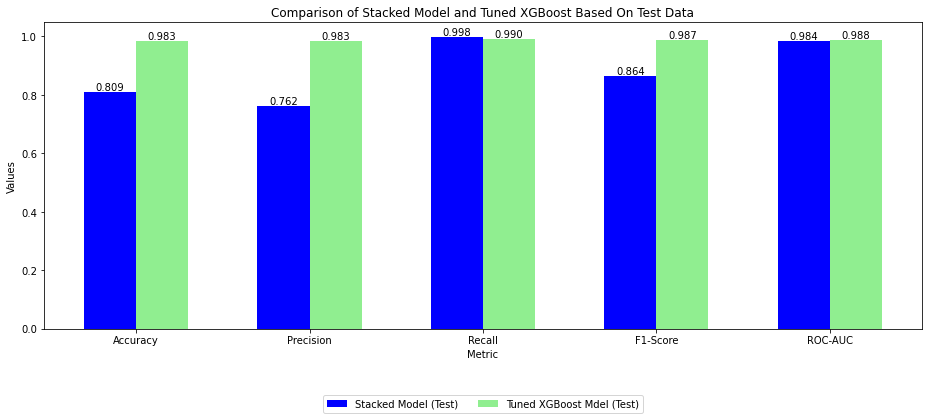

In [453]:
# The metrics and their values for both models based on testing data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
stacked_test_values = [0.8086866597724922, 0.7622739018087855, 0.9983079526226735, 0.8644688644688644, 0.9844565647838139]
xgboost_test_values = [0.983453981385729, 0.9831932773109243, 0.9898477157360406, 0.9865092748735245, 0.9876876552543471]

# Setting the width of the bars and the positions
bar_width = 0.3
index = np.arange(len(metrics))

# Creating the plot
plt.figure(figsize=(13, 6))
bar1 = plt.bar(index, stacked_test_values, bar_width, label='Stacked Model (Test)', color='blue', alpha=1)
bar2 = plt.bar(index + bar_width, xgboost_test_values, bar_width, label='Tuned XGBoost Mdel (Test)', color='lightgreen', alpha=1)

# Inserting numbers
for idx, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height, '{:.3f}'.format(stacked_test_values[idx]), ha='center', va='bottom')
    
for idx, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height, '{:.3f}'.format(xgboost_test_values[idx]), ha='center', va='bottom')

# Setting the labels, title, and legend
plt.xlabel('Metric')
plt.ylabel('Values')
plt.title('Comparison of Stacked Model and Tuned XGBoost Based On Test Data')
plt.xticks(index + bar_width / 2, metrics)  
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2) 
plt.tight_layout()
plt.show()

On unseen data, the Tuned XGBoost model excels in metrics like Accuracy, Precision, F1-Score, and ROC-AUC compared to the stacked model. While both models achieve high recall, the stacked model marginally outperforms XGBoost in this aspect. However, overall, XGBoost proves to be more consistent and reliable for predictions on this dataset.

##### Confusion Matrix

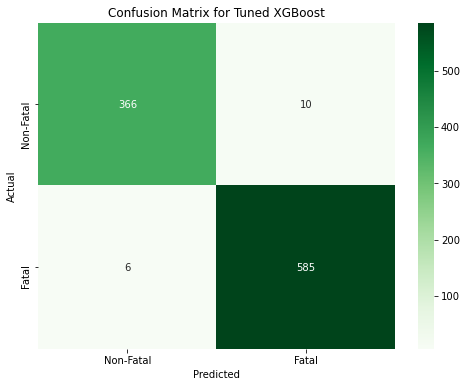

In [380]:
# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred_best_xgb)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d",cmap="Greens", xticklabels=['Non-Fatal', 'Fatal'], yticklabels=['Non-Fatal', 'Fatal'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Tuned XGBoost')
plt.show()

In the model's predictions, there were 585 true positives where events were correctly identified as Fatal, and 366 true negatives where events were accurately labeled as Non-Fatal. However, the model mistakenly classified 10 events as Fatal when they were actually Non-Fatal. Conversely, 6 events were incorrectly predicted as Non-Fatal when they were truly Fatal.

##### ROC Curve

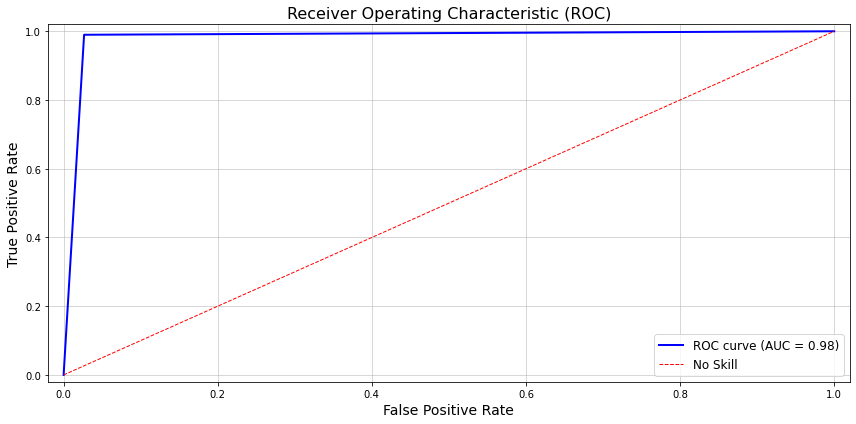

In [138]:
# AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))

# ROC curve
plt.plot(fpr, tpr, 'b-', label='ROC curve (AUC = %0.2f)' % roc_auc, linewidth=2)

# No skill line
plt.plot([0, 1], [0, 1],  color='red', linestyle='--', label='No Skill', linewidth=1)

plt.xlim([-0.02, 1.02])  
plt.ylim([-0.02, 1.02]) 

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.show()

The ROC curve, with an area of 0.98, illustrates the model's superior ability to differentiate between positive and negative classes. The ROC curve showcases an impressive balance throughout its range.

##### Precision-Recall Curve

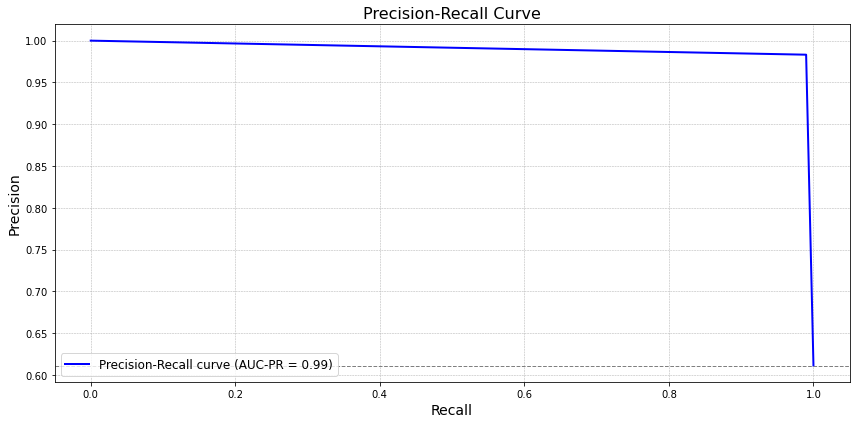

In [140]:
# AUC-PR score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_best_xgb)
area = auc(recall, precision)

plt.figure(figsize=(12, 6))

# Precision-recall curve
plt.plot(recall, precision, 'b-', label='Precision-Recall curve (AUC-PR = %0.2f)' % area, linewidth=2)

# No skill line
plt.axhline(y=len(y_test[y_test==1]) / len(y_test), linestyle='--', color='gray', linewidth=1)

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc="lower left", fontsize=12)
plt.tight_layout()
plt.show()

The precision-recall curve commences with perfect precision at zero recall, then maintains a steady and high precision as recall increases. Remarkably, the model maintains a precision above 0.97 even as recall approaches 0.98. Such behavior indicates the model's robustness in preserving high precision even while capturing most of the positive cases. The AUC-PR value of 0.99 further reinforces the model's exemplary performance across different decision thresholds. 

### Features Importance

In [351]:
# Extracting feature importances from our XGBoost model
feature_importances = best_xgb_classifier.feature_importances_

onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names(categorical_features).tolist()

# For OrdinalEncoder, we simply use the binary_features list directly
binary_feature_names = binary_features

# Getting the feature names after preprocessing
feature_names = (onehot_feature_names + 
                 binary_feature_names + 
                 ['Year', 'Month', 'Day'] + 
                 tfidf.get_feature_names())

# Creating a mapping of feature names to their importance
feature_map = dict(zip(feature_names, feature_importances))

# Sorting the features by importance
sorted_features = sorted(feature_map.items(), key=lambda x: x[1], reverse=True)

# Printing top 10 most important features
print("Top 10 most important features:")
for feature, importance in sorted_features[:13]:
    print(feature, importance)    

Top 10 most important features:
000 0.18619922
22 0.1301895
kitchen 0.10906815
digging 0.028833408
hours 0.027929466
Nature of Injury_Serious Fall/Strike 0.027101785
Nature of Injury_Amputation, Crushing 0.025673034
digger 0.024324743
duct 0.023850678
finishing 0.023317387
Event type_Shock 0.023258625
01 0.02232579
elevating 0.012493685


#### Refining the top features list by removing and replacing 22 and combining digging and digger.

In [350]:
# Investigating the context of texts like '22', 'hours' And '000'.
terms_to_investigate = ['22', '000', 'hours', '01']

for term in terms_to_investigate:
    print(f"Context for term: {term}")
    samples = df_clean[df_clean['combined_text'].str.contains(f"\\b{term}\\b", case=False, regex=True)]['combined_text'].sample(min(5, len(df))).tolist()
    for sample in samples:
        print(f"- {sample}")
    print("\n")

Context for term: 22
- At approximately 4:30 p.m. on September 22, 2015, an employee fell off the third level of a patio deck and landed 26 feet below to the ground. The employee sustained a broken neck and was killed.  EMPLOYEE FALLS FROM PATIO DECK AND IS KILLED DECKING,FALL,NECK
- At approximately 8:00 a.m. on February 22, 2017, Employee #1 was operating a wire forming machine. He stopped the machine by pressing the emergency stop button in response to an unusual noise, indicative of a stuck piece of wire, he heard.  After removing the stuck piece and de-activating the emergency stop, Employee #1 proceeded to reload new metal wire into the machine.  He was using his left hand to toggle the go and stop button while using his gloved right hand to position and load the new wire into the machine.  The third jog function button of the machine was not in operation.  His right hand was caught between a set of running rollers and his right hand thumb and index finger were crushed and amputa

**22**: "22" primarily represents a day of the month and doesn't provide any significant insight into the cause or nature of the incidents. Including dates in feature importance may skew the interpretation and distract from more meaningful features.

**01**: "01" appears in contexts either as a timestamp (representing an hour or day) or as part of an equipment identifier. When used as a timestamp, "01" serves merely as a specific time reference and does not provide meaningful insight into the cause or nature of incidents. 

**000**: "000" refers to numerical quantities, specifically values related to weights, measurements, or energy levels. Examples from the given incidents include "12,000 volt live wire," indicating a high voltage power line; "2,000 pounds" referring to the weight of palm trees and bundled rebar; and "10,000 pounds" related to the guardrail's rating. 

**Hours**: The term "hours" in these incidents signifies durations of time that are critical in understanding the context of each event. In the first incident, the duration the worker had been working can give insights into potential fatigue or prolonged exposure to heat, which may have led to heat stroke. In the second incident, the term denotes the delay between the injury and its diagnosis. 

In [335]:
feature_importances = best_xgb_classifier.feature_importances_

onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names(categorical_features).tolist()

binary_feature_names = binary_features

feature_names = (onehot_feature_names + 
                 binary_feature_names + 
                 ['Year', 'Month', 'Day'] + 
                 tfidf.get_feature_names())

feature_map = dict(zip(feature_names, feature_importances))

feature_map.pop('Year', None)
feature_map.pop('Month', None)
feature_map.pop('Day', None)

grouped_feature_map = {}
for feature, importance in feature_map.items():
    if 'digging' in feature:
        grouped_feature_map['digging'] = grouped_feature_map.get('digging', 0) + importance
    elif 'digger' in feature:
        grouped_feature_map['digger'] = grouped_feature_map.get('digger', 0) + importance
    else:
        grouped_feature_map[feature] = importance

sorted_features = sorted(grouped_feature_map.items(), key=lambda x: x[1], reverse=True)

top_10_features = [feature for feature, _ in sorted_features if feature != '22'][:10]

print("Top 10 most important features:")
for feature in top_10_features:
    print(feature, grouped_feature_map.get(feature, 0))


Top 10 most important features:
000 0.18619922
kitchen 0.10906815
digging 0.028833407908678055
hours 0.027929466
Nature of Injury_Serious Fall/Strike 0.027101785
Nature of Injury_Amputation, Crushing 0.025673034
digger 0.024324743077158928
duct 0.023850678
finishing 0.023317387
Event type_Shock 0.023258625


In [454]:
feature_importances = best_xgb_classifier.feature_importances_

onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names(categorical_features).tolist()

binary_feature_names = binary_features

feature_names = (onehot_feature_names + 
                 binary_feature_names + 
                 ['Year', 'Month', 'Day'] + 
                 tfidf.get_feature_names())

feature_map = dict(zip(feature_names, feature_importances))

feature_map.pop('Year', None)
feature_map.pop('Month', None)
feature_map.pop('Day', None)

grouped_feature_map = {}
for feature, importance in feature_map.items():
    if 'digging' in feature or 'digger' in feature:
        grouped_feature_map['digging_digger'] = grouped_feature_map.get('digging_digger', 0) + importance
    else:
        grouped_feature_map[feature] = importance

sorted_features = sorted(grouped_feature_map.items(), key=lambda x: x[1], reverse=True)
top_10_features = [feature for feature, _ in sorted_features if feature not in ['01', '22']][:10]

print("Top 10 most important features:")
for feature in top_10_features:
    print(feature, grouped_feature_map.get(feature, 0))


Top 10 most important features:
000 0.18619922
kitchen 0.10906815
digging_digger 0.05315815098583698
hours 0.027929466
Nature of Injury_Serious Fall/Strike 0.027101785
Nature of Injury_Amputation, Crushing 0.025673034
duct 0.023850678
finishing 0.023317387
Event type_Shock 0.023258625
elevating 0.012493685


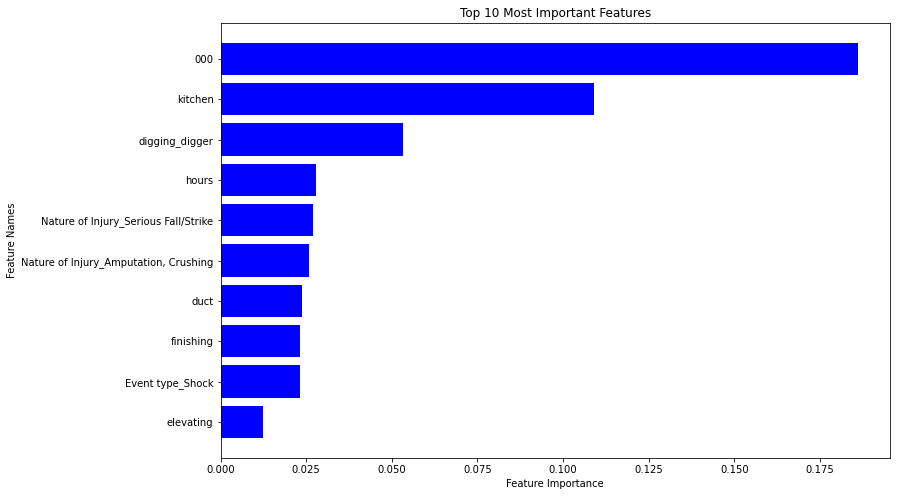

In [349]:
feature_names = ["000", "kitchen", "digging_digger", "hours", "Nature of Injury_Serious Fall/Strike",
                 "Nature of Injury_Amputation, Crushing", "duct", "finishing", "Event type_Shock", "elevating"]
importance_scores = [0.18619922, 0.10906815, 0.05315815098583698, 0.027929466, 0.027101785,
                     0.025673034, 0.023850678, 0.023317387, 0.023258625, 0.012493685]

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(feature_names, importance_scores, color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.show()
